In [56]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

In [57]:
sp = yf.Ticker("^GSPC")

In [58]:
sp = sp.history(period="max")

In [59]:
sp

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,0,0
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,0,0
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,0,0
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,0,0
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,0,0
...,...,...,...,...,...,...,...
2023-08-15,4478.870117,4478.870117,4432.189941,4437.859863,3832250000,0,0
2023-08-16,4433.790039,4449.950195,4403.549805,4404.330078,3753910000,0,0
2023-08-17,4416.319824,4421.169922,4364.830078,4370.359863,3943700000,0,0


In [60]:
sp.index

DatetimeIndex(['1950-01-03', '1950-01-04', '1950-01-05', '1950-01-06',
               '1950-01-09', '1950-01-10', '1950-01-11', '1950-01-12',
               '1950-01-13', '1950-01-16',
               ...
               '2023-08-08', '2023-08-09', '2023-08-10', '2023-08-11',
               '2023-08-14', '2023-08-15', '2023-08-16', '2023-08-17',
               '2023-08-18', '2023-08-21'],
              dtype='datetime64[ns]', name='Date', length=18528, freq=None)

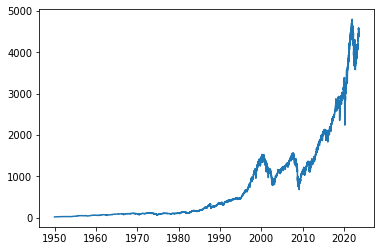

In [61]:
plt.plot(sp.index,sp["Close"])
plt.show()

In [62]:
del sp["Dividends"]
del sp["Stock Splits"]

In [63]:
sp["Tomorrow"] = sp["Close"].shift(-1)

In [64]:
sp

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,16.850000
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,16.930000
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,16.980000
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,17.080000
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,17.030001
...,...,...,...,...,...,...
2023-08-15,4478.870117,4478.870117,4432.189941,4437.859863,3832250000,4404.330078
2023-08-16,4433.790039,4449.950195,4403.549805,4404.330078,3753910000,4370.359863
2023-08-17,4416.319824,4421.169922,4364.830078,4370.359863,3943700000,4369.709961


In [65]:
sp["Objective"] = (sp["Tomorrow"] > sp["Close"]).astype(int)

In [66]:
sp

,Open,High,Low,Close,Volume,Tomorrow,Objective
Date,,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,16.850000,1
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,16.930000,1
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,16.980000,1
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,17.080000,1
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,17.030001,0
...,...,...,...,...,...,...,...
2023-08-15,4478.870117,4478.870117,4432.189941,4437.859863,3832250000,4404.330078,0
2023-08-16,4433.790039,4449.950195,4403.549805,4404.330078,3753910000,4370.359863,0
2023-08-17,4416.319824,4421.169922,4364.830078,4370.359863,3943700000,4369.709961,0


In [67]:
sp = sp.loc["1990-01-01":].copy()

In [68]:
sp

,Open,High,Low,Close,Volume,Tomorrow,Objective
Date,,,,,,,
1990-01-02,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2023-08-15,4478.870117,4478.870117,4432.189941,4437.859863,3832250000,4404.330078,0
2023-08-16,4433.790039,4449.950195,4403.549805,4404.330078,3753910000,4370.359863,0
2023-08-17,4416.319824,4421.169922,4364.830078,4370.359863,3943700000,4369.709961,0


In [69]:
from sklearn.ensemble import RandomForestClassifier

model= RandomForestClassifier(n_estimators=300, min_samples_split=100, random_state=79)

train = sp.iloc[:-100]
test = sp.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Objective"])

RandomForestClassifier(min_samples_split=100, n_estimators=300, random_state=79)

In [70]:
from sklearn.metrics import precision_score

predictions = model.predict(test[predictors])

In [71]:
predictions = pd.Series(predictions, index=test.index)

In [72]:
predictions

Date
2023-03-29    0
2023-03-30    0
2023-03-31    0
2023-04-03    0
2023-04-04    1
             ..
2023-08-15    1
2023-08-16    1
2023-08-17    1
2023-08-18    1
2023-08-21    0
Length: 100, dtype: int32

In [73]:
precision_score(test["Objective"], predictions)

0.5737704918032787

In [74]:
combined = pd.concat([test["Objective"], predictions], axis=1)

<AxesSubplot:xlabel='Date'>

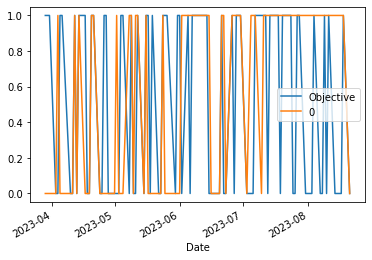

In [75]:
combined.plot()

In [76]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Objective"])
    predictions = model.predict(test[predictors])
    predictions = pd.Series(predictions, index=test.index, name="Predictions")
    combined = pd.concat([test["Objective"], predictions], axis=1)
    return combined

In [77]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [78]:
predictions = backtest(sp, model, predictors)

In [79]:
predictions["Predictions"].value_counts()

0    3398
1    2576
Name: Predictions, dtype: int64

In [80]:
precision_score(predictions["Objective"], predictions["Predictions"])

0.5283385093167702

In [81]:
predictions["Objective"].value_counts() / predictions.shape[0]

1    0.533646
0    0.466354
Name: Objective, dtype: float64

In [82]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp.rolling (horizon).mean()

    ratio_column=f"Close_Ratio_{horizon}"
    sp [ratio_column] = sp["Close"] / rolling_averages["Close"]

    trend_column= f"Trend_{horizon}"
    sp [trend_column] = sp.shift(1).rolling(horizon).sum()["Objective"]
    
    new_predictors += [ratio_column, trend_column]

In [83]:
sp = sp.dropna()

In [84]:
sp

,Open,High,Low,Close,Volume,Tomorrow,Objective,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-14,4458.129883,4490.330078,4453.439941,4489.720215,3896410000,4437.859863,0,1.002867,1.0,1.002631,2.0,1.020476,34.0,1.103469,120.0,1.169828,534.0
2023-08-15,4478.870117,4478.870117,4432.189941,4437.859863,3832250000,4404.330078,0,0.994191,1.0,0.993780,2.0,1.007773,33.0,1.090581,119.0,1.155837,534.0
2023-08-16,4433.790039,4449.950195,4403.549805,4404.330078,3753910000,4370.359863,0,0.996208,0.0,0.989080,2.0,0.999356,33.0,1.082203,119.0,1.146648,533.0


In [85]:
model = RandomForestClassifier(n_estimators= 500, min_samples_split= 75, random_state=79)

In [86]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Objective"])
    predictions = model.predict_proba(test[predictors])[:,1]
    predictions[predictions >= .6] = 1
    predictions[predictions < .6] = 0
    predictions = pd.Series(predictions, index=test.index, name="Predictions")
    combined = pd.concat([test["Objective"], predictions], axis=1)
    return combined

In [87]:
predictions = backtest(sp, model, new_predictors)

In [88]:
predictions["Predictions"].value_counts()

0.0    4287
1.0     686
Name: Predictions, dtype: int64

In [89]:
precision_score(predictions["Objective"], predictions["Predictions"])

0.5641399416909622